In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
stock_data = pd.read_csv("https://stooq.com/q/d/l/?s=cdr&d1=20200101&d2=20201231&i=d")
stock_data["TradeDate"] = stock_data.index
stock_data

,Date,Open,High,Low,Close,Volume,TradeDate
0,2020-01-02,274.10,278.77,273.13,278.77,172311,0
1,2020-01-03,278.96,281.69,273.23,277.99,251004,1
2,2020-01-07,279.06,280.33,274.98,275.85,218998,2
3,2020-01-08,275.56,275.85,269.54,273.23,230932,3
4,2020-01-09,276.05,280.52,275.08,280.52,200512,4
...,...,...,...,...,...,...,...
247,2020-12-22,255.25,268.18,254.66,260.20,1537522,247
248,2020-12-23,267.30,267.88,244.94,261.47,1490437,248
249,2020-12-28,257.58,266.33,249.90,266.33,1062237,249
250,2020-12-29,271.67,277.21,266.72,272.65,710269,250


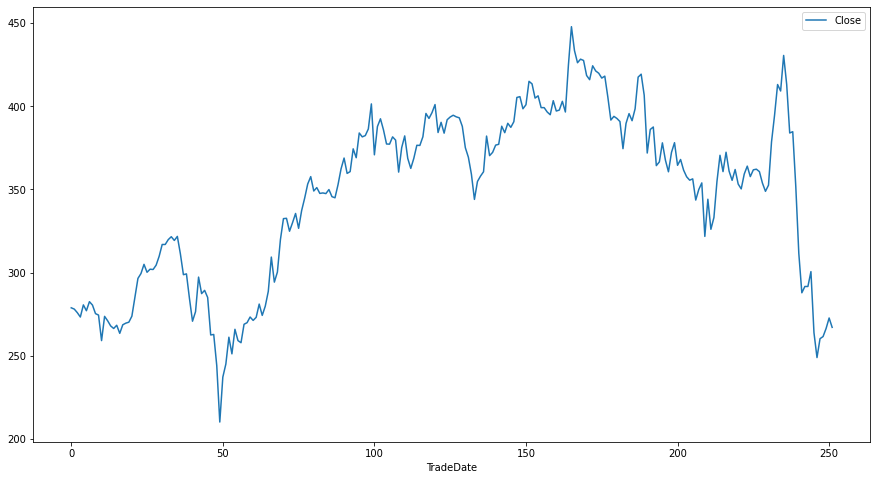

In [22]:
stock_data.plot(x="TradeDate", y="Close", figsize=(15,8))

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
# ekstracja danych z kol. Close do numpy
close_data = stock_data[["Close"]].values

# inicjalizacja scalera i jego wzorca
sc = MinMaxScaler()
data_scaler = sc.fit(close_data)

X = data_scaler.transform(close_data)

In [25]:
X_samples = []
y_samples = []

total_number = len(X)
time_step = 10

for i in range(time_step, total_number):
  x_sample = X[i-time_step:i]
  y_sample = X[i]

  X_samples.append(x_sample)
  y_samples.append(y_sample)

In [26]:
# liczba próbek / timestep / liczba cech
X_data = np.array(X_samples)
X_data.shape

(242, 10, 1)

In [27]:
y_data = np.array(y_samples)
y_data.shape

(242, 1)

In [28]:
# liczba rekordów testowych
test_records = 30

X_train = X_data[:-test_records]
X_test = X_data[-test_records:]

y_train = y_data[:-test_records]
y_test = y_data[-test_records:]

X_train.shape, y_train.shape

((212, 10, 1), (212, 1))

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [30]:
model = Sequential()
model.add( LSTM(32, activation="relu", input_shape=(time_step,1), return_sequences=True  ) )
model.add( LSTM(16, activation="relu",  return_sequences=True  ) )
model.add( LSTM(8, activation="relu",  return_sequences=False  ) )
model.add( Dense(1) )
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [31]:
result = model.fit(X_train, y_train, epochs=150)

Epoch 1/150
7/7 [==============================] - 3s 14ms/step - loss: 0.3599 - mae: 0.5639
Epoch 2/150
7/7 [==============================] - 0s 14ms/step - loss: 0.3062 - mae: 0.5163
Epoch 3/150
7/7 [==============================] - 0s 16ms/step - loss: 0.2440 - mae: 0.4547
Epoch 4/150
7/7 [==============================] - 0s 14ms/step - loss: 0.1677 - mae: 0.3671
Epoch 5/150
7/7 [==============================] - 0s 14ms/step - loss: 0.0798 - mae: 0.2450
Epoch 6/150
7/7 [==============================] - 0s 14ms/step - loss: 0.0246 - mae: 0.1235
Epoch 7/150
7/7 [==============================] - 0s 14ms/step - loss: 0.0304 - mae: 0.1356
Epoch 8/150
7/7 [==============================] - 0s 15ms/step - loss: 0.0192 - mae: 0.1103
Epoch 9/150
7/7 [==============================] - 0s 14ms/step - loss: 0.0198 - mae: 0.1179
Epoch 10/150
7/7 [==============================] - 0s 14ms/step - loss: 0.0164 - mae: 0.0983
Epoch 11/150
7/7 [==============================] - 0s 15ms/step - lo

In [32]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 491ms/step - loss: 0.0114 - mae: 0.0813


[0.011370821855962276, 0.081285759806633]

In [33]:
y_test.shape

(30, 1)

In [34]:
y_pred = model.predict(X_test)

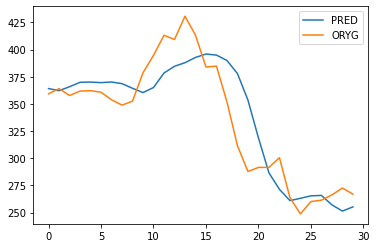

In [35]:
plt.plot( data_scaler.inverse_transform(y_pred))
plt.plot( data_scaler.inverse_transform(y_test))
plt.legend(["PRED","ORYG"])
plt.show()

In [36]:
# predykcja na "dzień po"
x = close_data[-time_step:] # pobierz N probek wstecz (na podstawie time_step)
x = data_scaler.transform(x) # normalizacja
x = x.reshape(1, time_step, 1)
data_scaler.inverse_transform(model.predict(x)) # predykcja i denormalizacja

array([[264.4914]], dtype=float32)